# SQL and BigQuery

To install using anaconda:
```bash
conda install -c conda-forge google-cloud-bigquery
```

Or use pip:
```bash
pip install google-cloud-bigquery
```

In [3]:
# Import Packages
from google.cloud import bigquery

Set google credentials for this environment. 

For more information follow: https://cloud.google.com/docs/authentication/getting-started#auth-cloud-implicit-python

In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sql-bigquery-341310-c5b9409e541c.json"

In [5]:
# Create a "Client" object
client = bigquery.Client()

In BigQuery, each dataset is contained in a corresponding project. In this case, our hacker_news dataset is contained in the bigquery-public-data project. To access the dataset,

- We begin by constructing a reference to the dataset with the dataset() method.
- Next, we use the get_dataset() method, along with the reference we just constructed, to fetch the dataset.

In [32]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [5]:
# List all tables in "hacker_news" dataset
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

comments
full
full_201510
stories


In [6]:
# Construct a reference to a table
table_ref = dataset_ref.table('full')

# API request - fetch the table
table = client.get_table(table_ref)

## Table Schema

The structure of a table is called its schema. We need to understand a table's schema to effectively pull out the data we want.

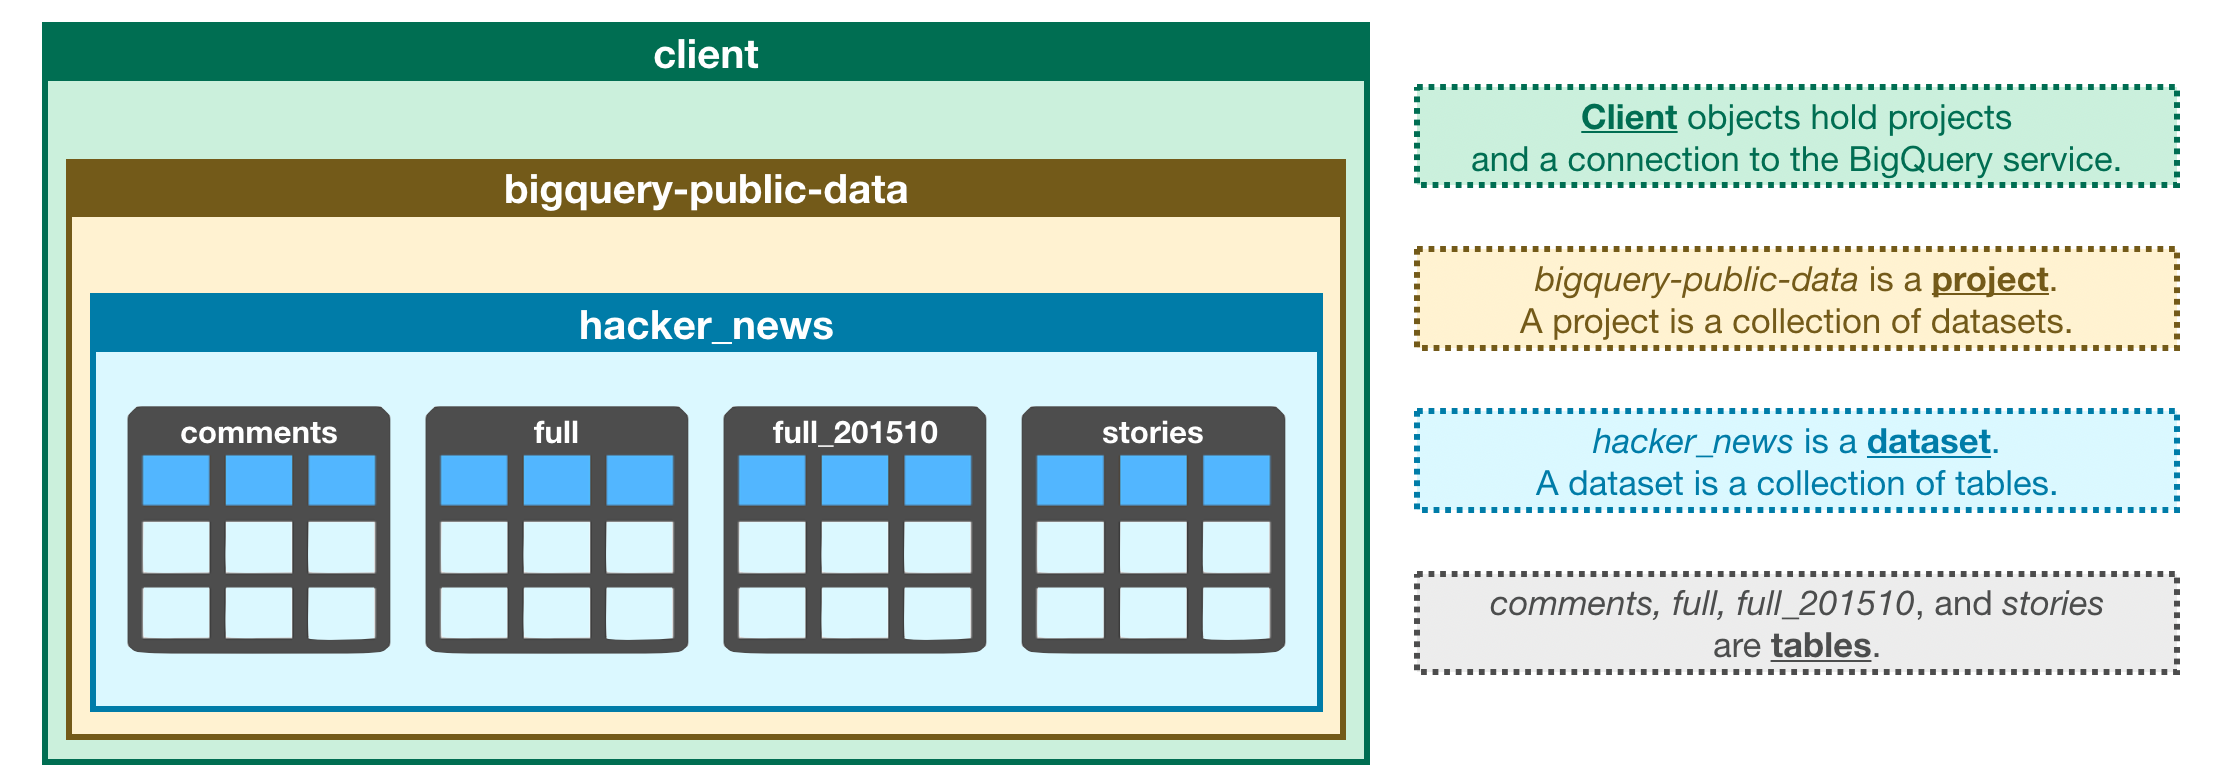

In [7]:
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), None),
 SchemaField

Each SchemaField tells us about a specific column (which we also refer to as a field). In order, the information is:

- The name of the column
- The field type (or datatype) in the column
- The mode of the column ('NULLABLE' means that a column allows NULL values, and is the default)
- A description of the data in that column

In [9]:
# Preview first five lines
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,&gt; Most US immigrant visas (h-1b etc)<p>H-1B...,None,dragonwriter,NaN,1527170116,2018-05-24 13:55:16+00:00,comment,17143973,17143806,NaN,NaN,None
1,None,None,What&#x27;s non relational data?<p>You can hav...,None,Retric,NaN,1527170109,2018-05-24 13:55:09+00:00,comment,17143972,17143336,NaN,NaN,None
2,None,None,"There are a few concerns, but I am not sure I&...",None,davismwfl,NaN,1527170107,2018-05-24 13:55:07+00:00,comment,17143971,17143247,NaN,NaN,None
3,None,None,"Lmfao, simply switch to a better job. Simple s...",True,justherefortart,NaN,1527170106,2018-05-24 13:55:06+00:00,comment,17143970,17143953,NaN,NaN,None
4,None,None,"Check out <a href=""https:&#x2F;&#x2F;en.wikipe...",None,Amorymeltzer,NaN,1480634058,2016-12-01 23:14:18+00:00,comment,13084528,13083693,NaN,NaN,None


In [10]:
# Preview first 5 entries in the column "by"
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,title
0,None
1,None
2,None
3,None
4,None


## Select, From & Where

The most basic SQL query selects a single column from a single table. To do this:
- Specify the column you want after the word SELECT, and then
- Specify the table after the word FROM.
- Return only the rows meeting specific conditions. You can do this using the WHERE clause.

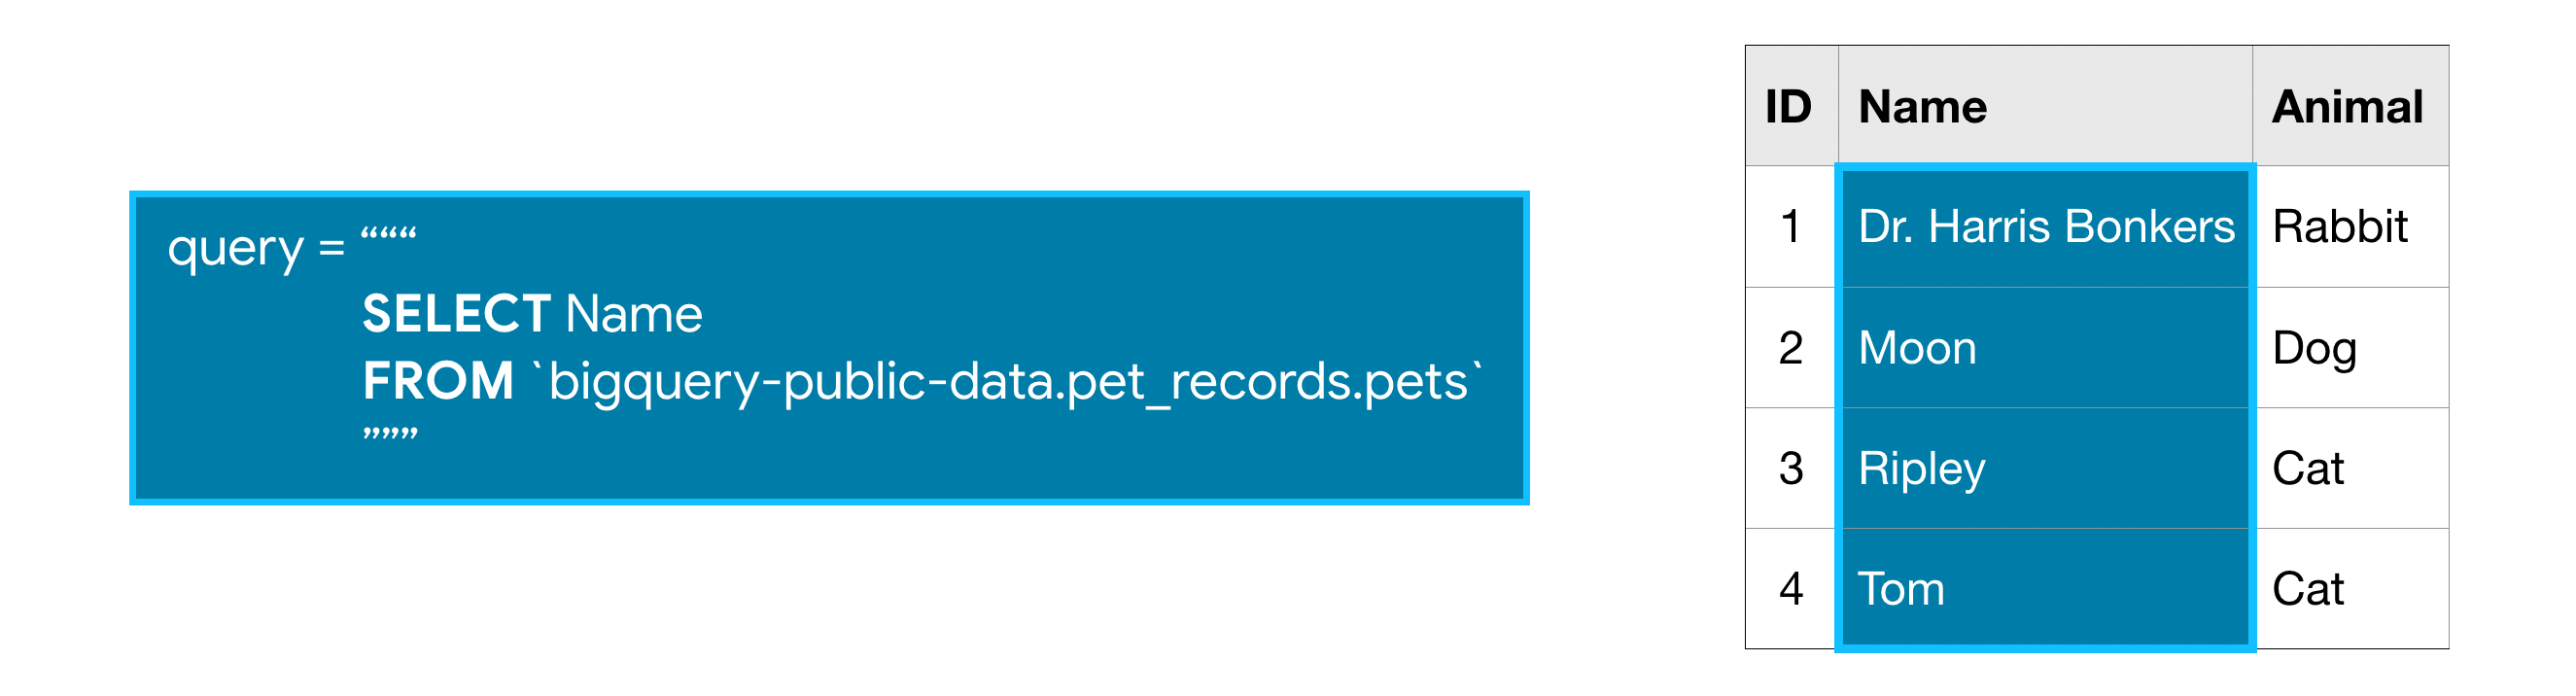

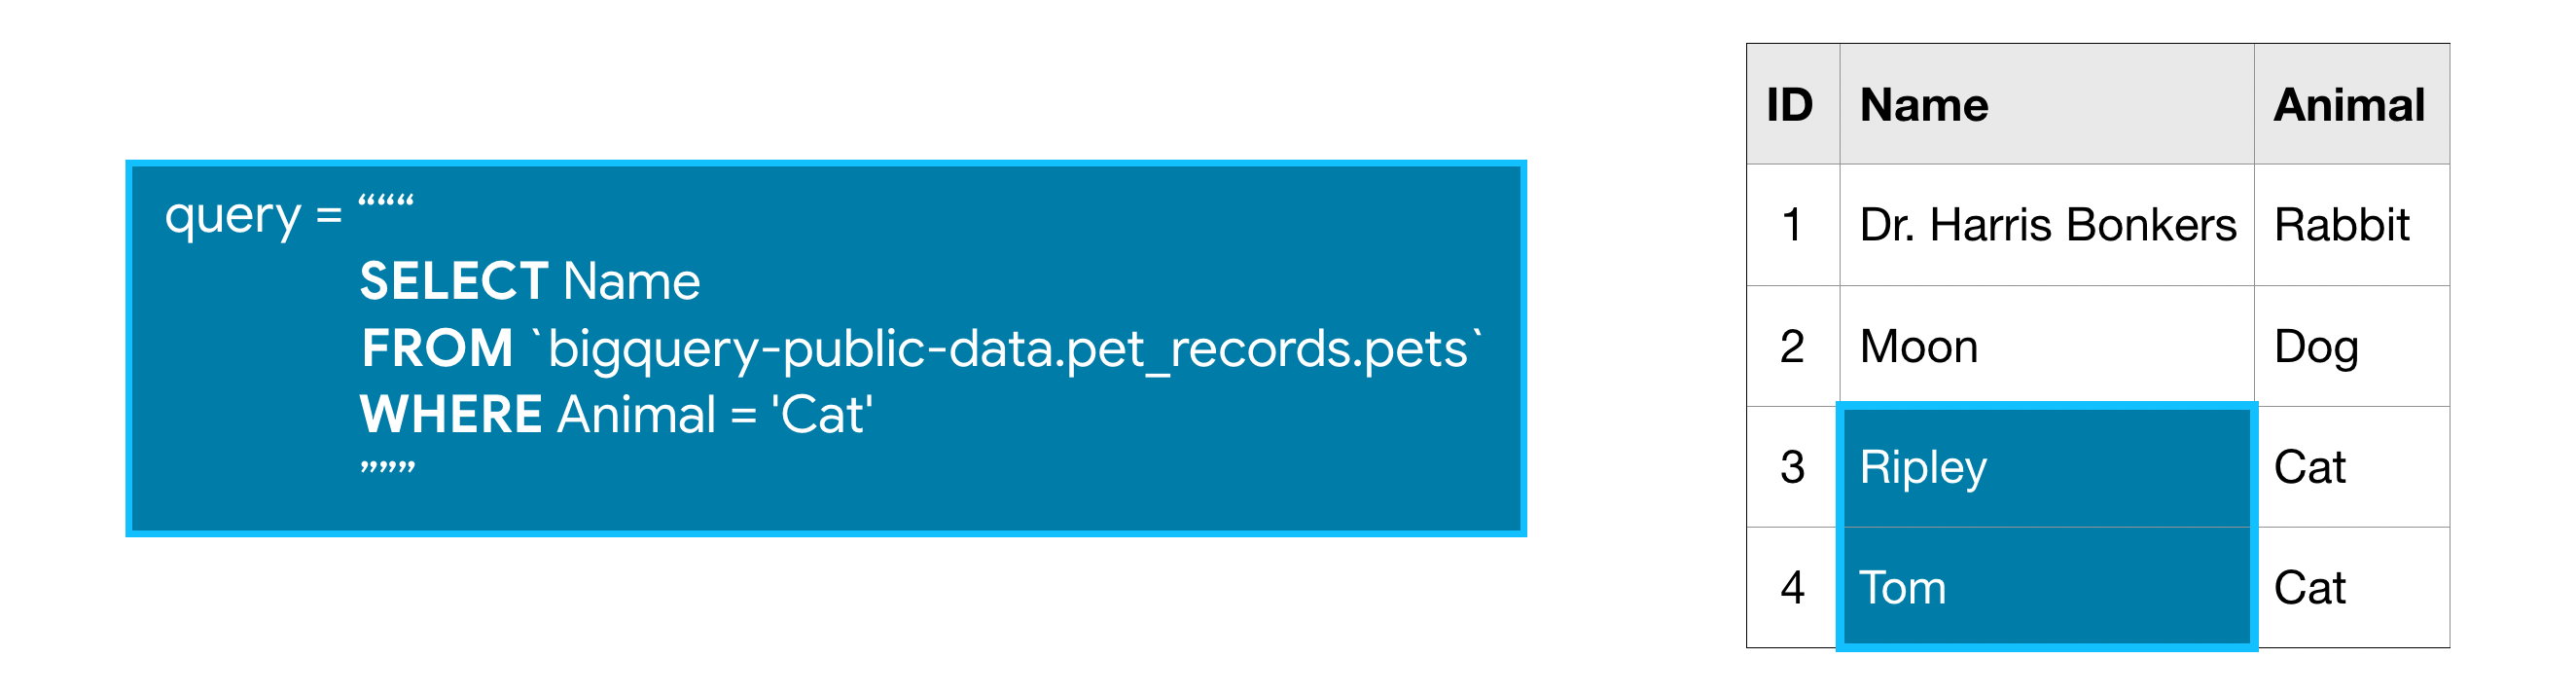

In [10]:
# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [11]:
tables = list(client.list_tables(dataset_ref))
for table in tables:
    print(table.table_id)

global_air_quality


In [7]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


In [15]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

In [ ]:
# If you want multiple columns, you can select them with a comma between the names
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

In [20]:
# You can select all columns with a * 
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

In [ ]:
# Query to select countries with units of "ppm", DISTINCT doesn't allow repetitions
first_query = """
              SELECT DISTINCT country
              FROM `bigquery-public-data.openaq.global_air_quality`
              WHERE unit='ppm'
              """

In [21]:
# Set up the query
query_job = client.query(query)

In [22]:
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()
us_cities.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Aberdeen,BROWN,US,no2,14.0000,2020-06-11 01:00:00+00:00,µg/m³,DEFRA,45.468597,-98.494064,1.0
1,Aberdeen,BROWN,US,o3,65.0000,2020-06-11 01:00:00+00:00,µg/m³,DEFRA,45.468597,-98.494064,8.0
2,Aberdeen,BROWN,US,pm10,10.0000,2020-06-11 01:00:00+00:00,µg/m³,DEFRA,45.468597,-98.494064,24.0
3,Aberdeen,BROWN,US,pm25,5.0000,2020-06-11 01:00:00+00:00,µg/m³,DEFRA,45.468597,-98.494064,24.0
4,Freeport South Avenue I C1012,Houston,US,so2,0.0001,2016-03-06 18:00:00+00:00,ppm,Texas,28.964430,-95.354830,1.0


In [19]:
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     88
Houston                                     82
Los Angeles-Long Beach-Santa Ana            68
Riverside-San Bernardino-Ontario            60
New York-Northern New Jersey-Long Island    60
Name: city, dtype: int64

## Estimate Datasets Size

In [25]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} MB.".format(dry_run_query_job.total_bytes_processed/1e6))

This query will process 510.431847 MB.


In [27]:
# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

In [31]:
job_post_scores.score.mean()

1.764953722889902

## Group By, Having & Count

COUNT() returns a count of things. If you pass it the name of a column, it will return the number of entries in that column. COUNT() is an example of an aggregate function, which takes many values and returns one. (Other examples of aggregate functions include SUM(), AVG(), MIN(), and MAX() )

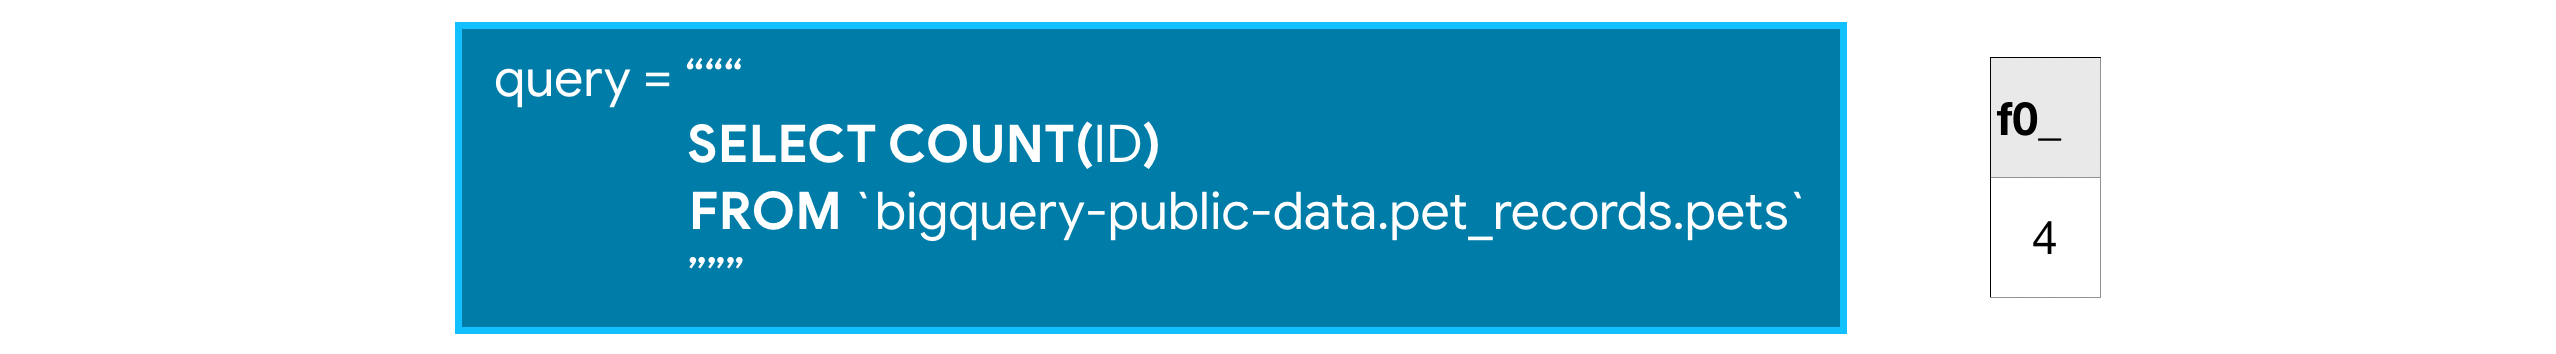

GROUP BY takes the name of one or more columns, and treats all rows with the same value in that column as a single group when you apply aggregate functions like COUNT().

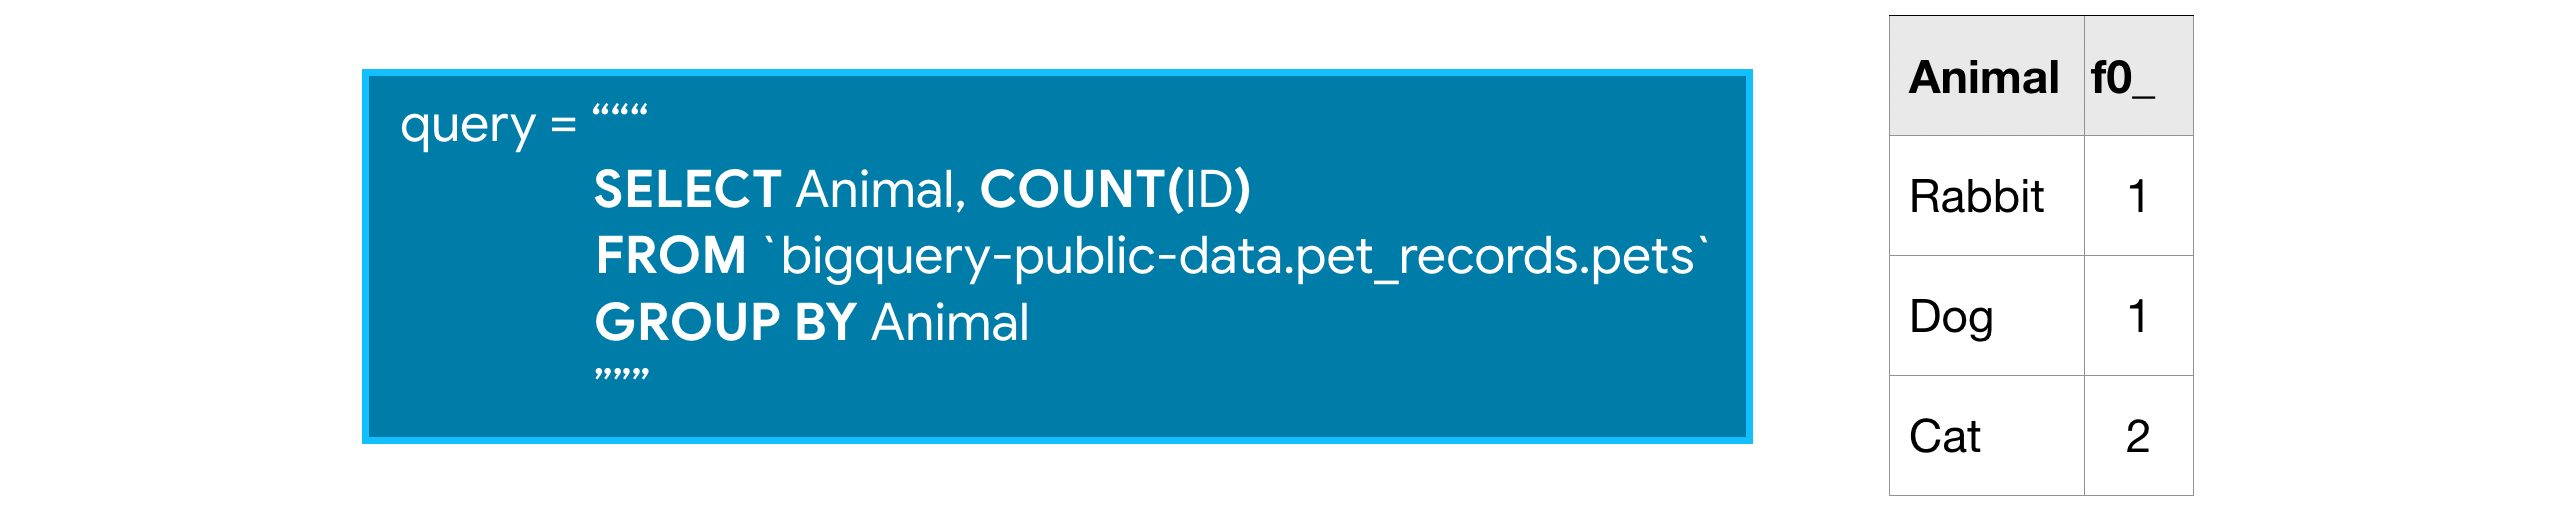

HAVING is used in combination with GROUP BY to ignore groups that don't meet certain criteria.

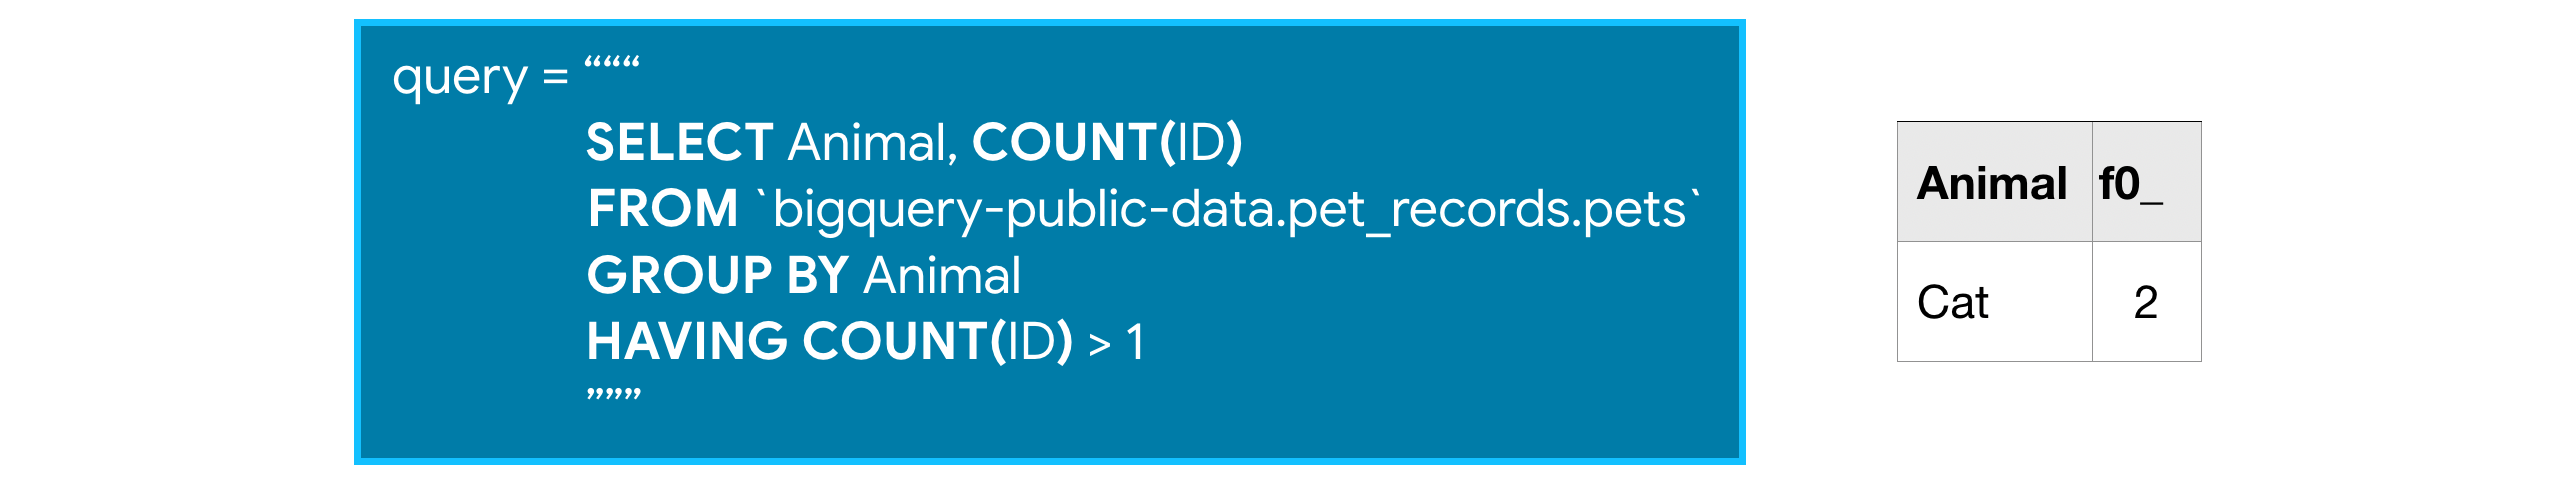

In [33]:
# Going back to the Hacker News example
# Construct a reference to the "comments" table
table_ref = dataset_ref.table("comments")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "comments" table
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [34]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

In [37]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.comments`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

In [39]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_improved, job_config=safe_config)

popular_comments = query_job.to_dataframe()
popular_comments.head()

,parent,NumPosts
0,801208,56
1,5463210,55
2,6455391,67
3,8336025,50
4,3785277,85


In [42]:
def run_query(query, client, max_bytes):
    
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=max_bytes)
    query_job = client.query(query, job_config=safe_config)
    
    return query_job.to_dataframe()

## Order By, Dates & Extract

You can reverse the order using the DESC argument (short for 'descending')

Dates: https://cloud.google.com/bigquery/docs/reference/legacy-sql#datetimefunctions

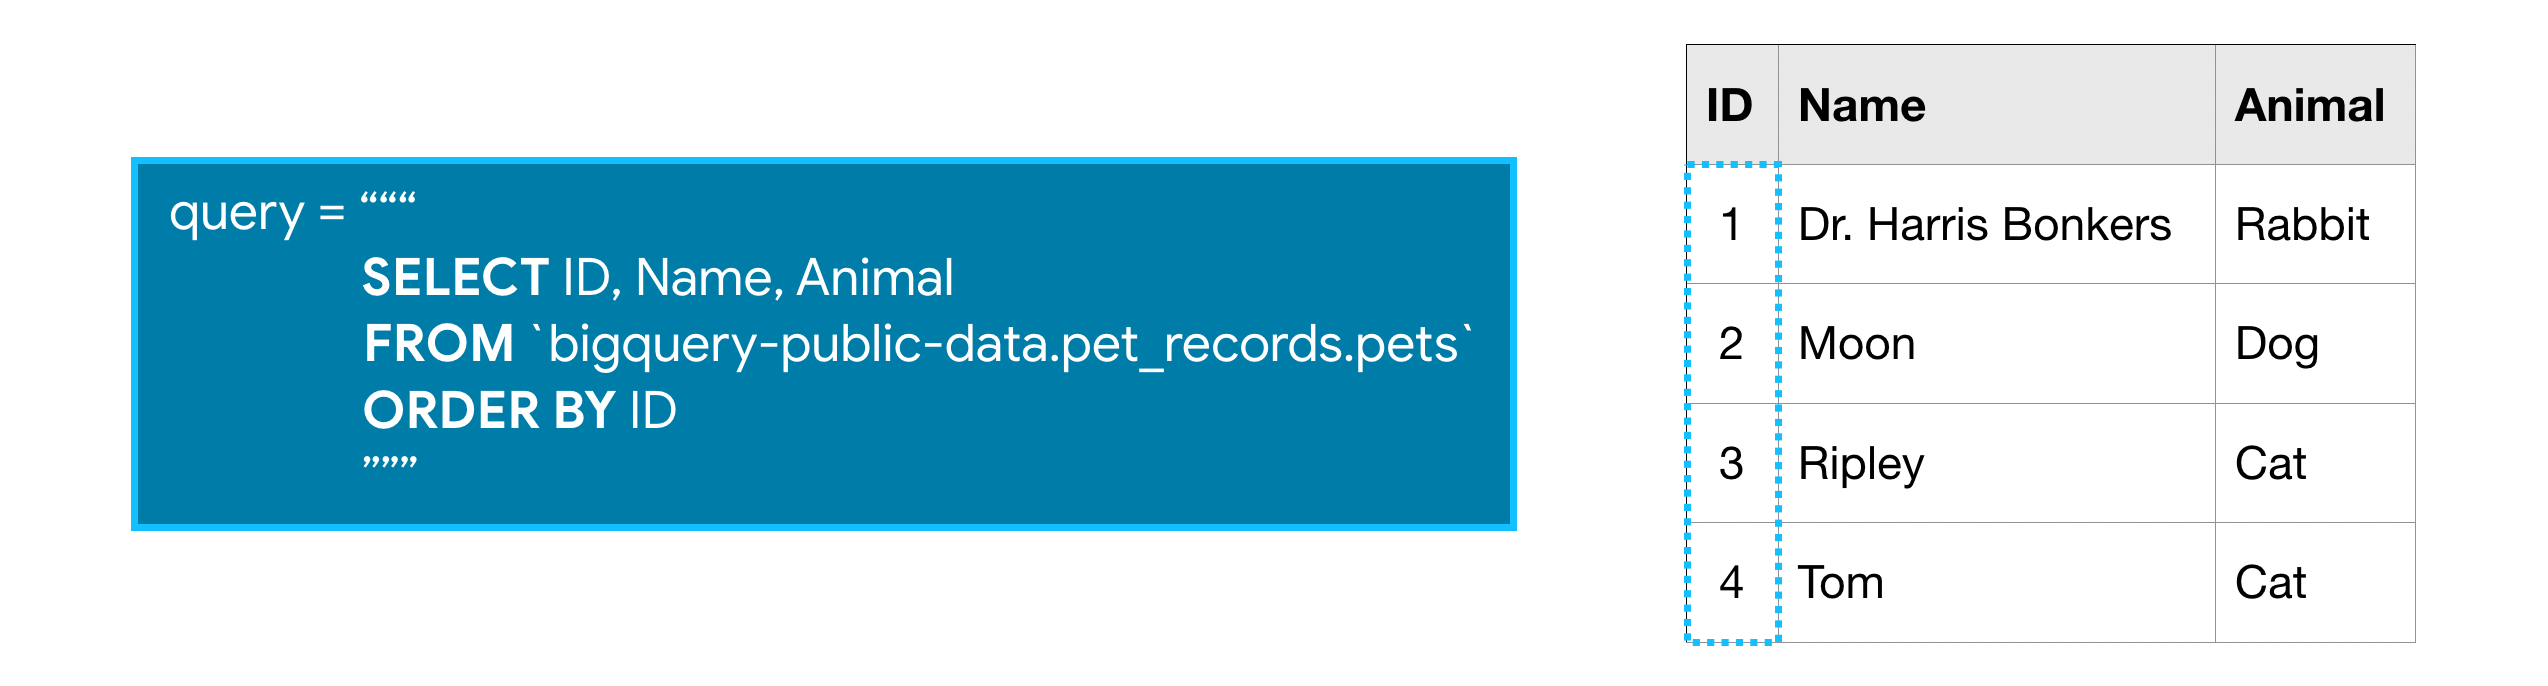

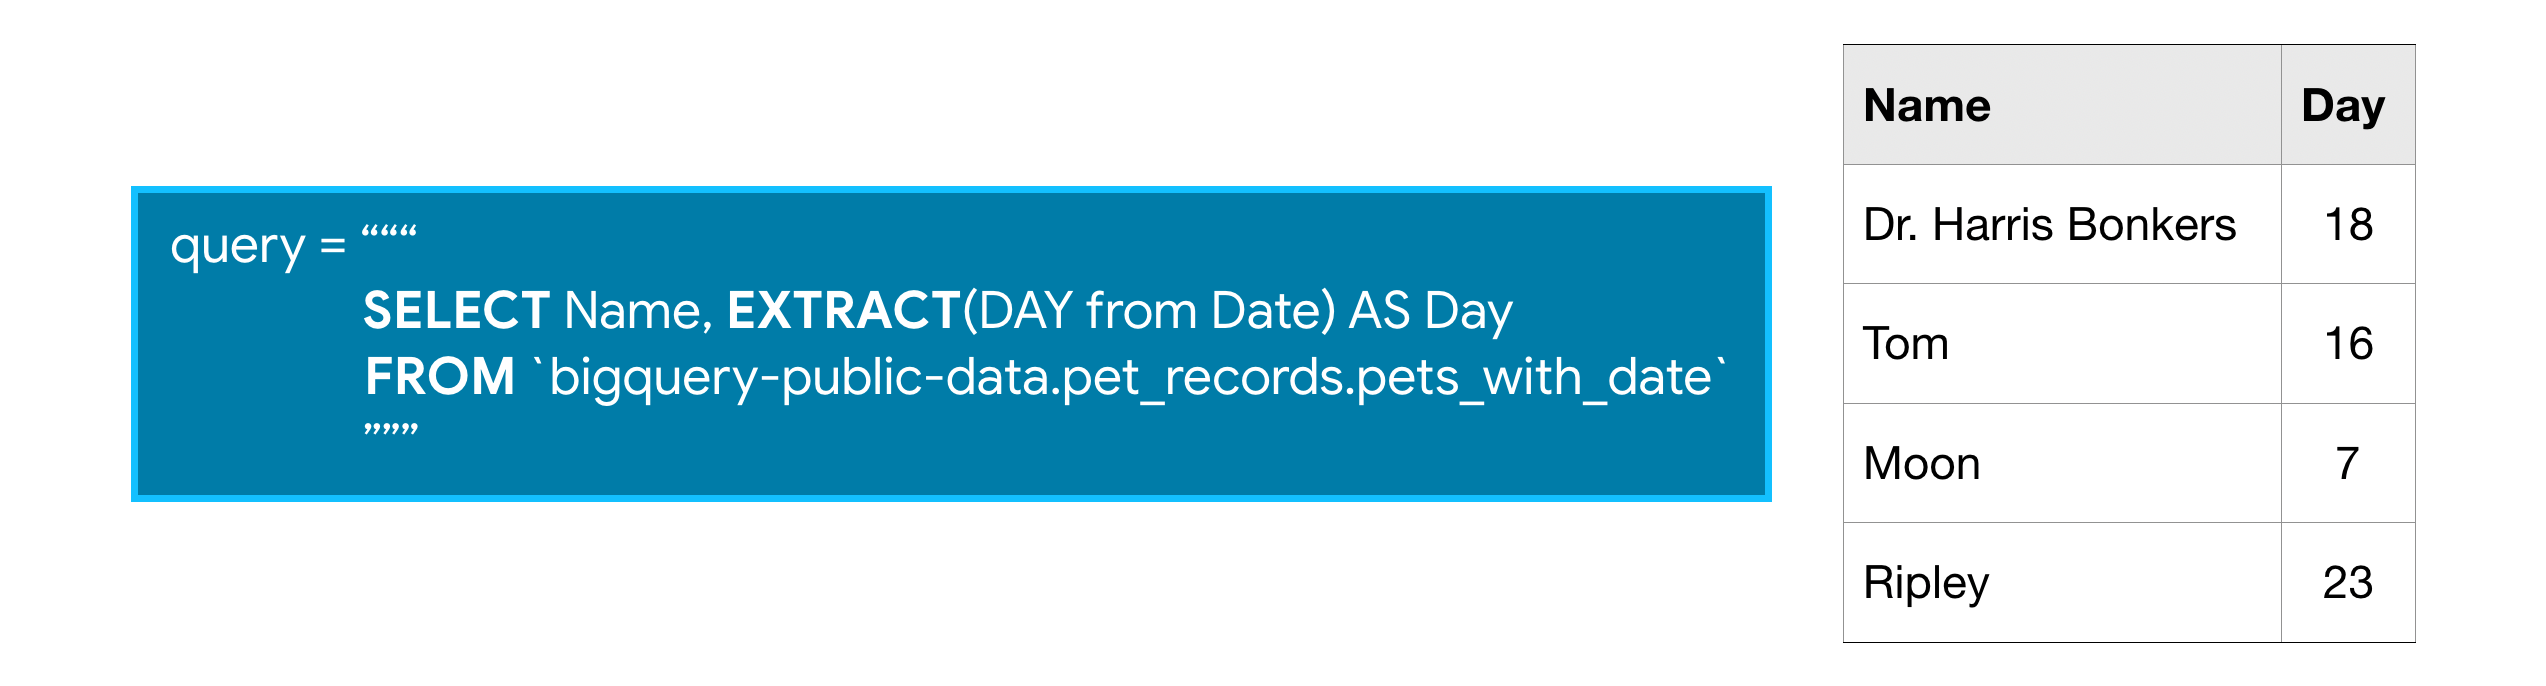

In [40]:
# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,...,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,...,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,...,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-10-31 04:49:00+00:00


Let's use the table to determine how the number of accidents varies with the day of the week
- EXTRACT the day of the week (as day_of_week in the query below) from the timestamp_of_crash column, and
- GROUP BY the day of the week, before we COUNT the consecutive_number column to determine the number of accidents for each day of the week.

In [41]:
query = """
        SELECT COUNT(consecutive_number) AS num_accidents,
                EXTRACT (DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

In [44]:
accidents_by_day = run_query(query, client, 10**9)

In [45]:
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


## As & With

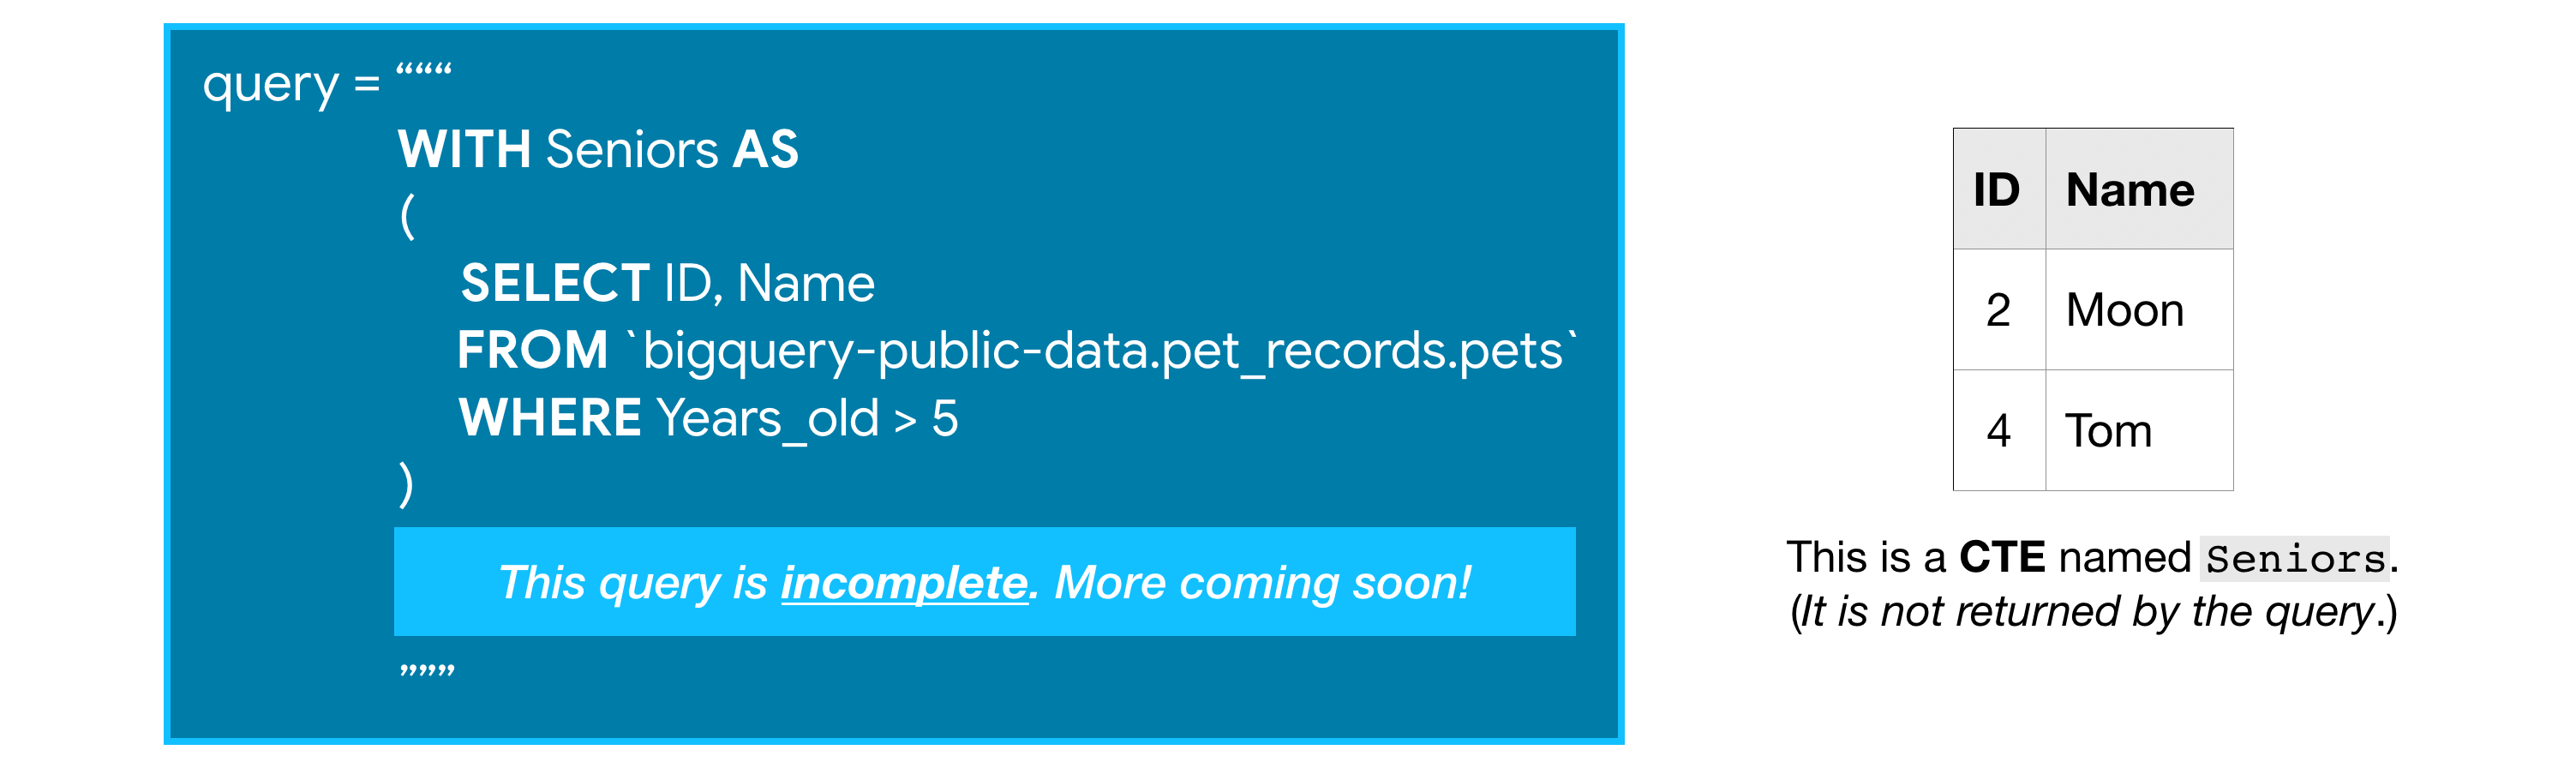

In [17]:
from bigquery_functions import *

In [18]:
dataset_ref = list_dataset_tables(client, 'crypto_bitcoin')

blocks
inputs
outputs
transactions


In [21]:
table = get_table(client, dataset_ref, 'transactions')

In [23]:
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [24]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

In [25]:
transactions_by_date = run_query(query_with_CTE, client, 10**10)
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


<AxesSubplot:xlabel='trans_date'>

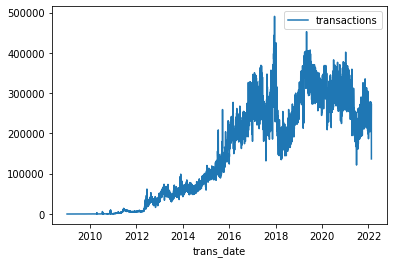

In [26]:
import matplotlib.pyplot as plt
transactions_by_date.set_index('trans_date').plot()